# Goal of this notebook

This notebook allows to test the fully connected neural network made from scratch that you can find inside the script FC_nn.py.
You can reach 99% of accuracy on the mnist test dataset with it.
It also allows to compare this network with fully connected network of keras.

# Load standard libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load mnist data

In [14]:
from keras.datasets import mnist

In [15]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Vizualize mnist data

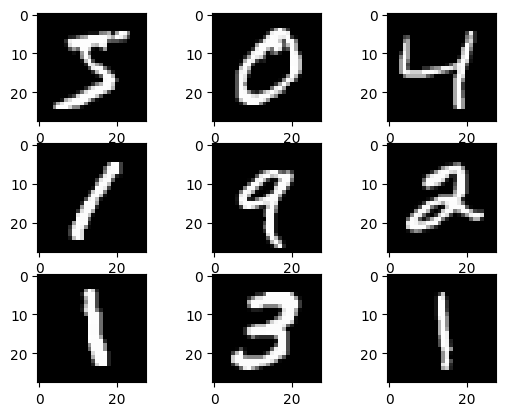

In [16]:
fig, ax = plt.subplots(3,3)
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(train_X[k], cmap=plt.get_cmap('gray'))
        k += 1
plt.show()

# Load the FC NN made from scratch

In [17]:
from FC_nn import FC

# Preprocess mnist data

## reshape and renormalize

In [18]:
x_train = train_X.reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2]).T
x_train = x_train/255
train_y_reshape = train_y.reshape(1, train_y.shape[0])
x_test = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2]).T
x_test = x_test/255
test_y_reshape = test_y.reshape(1, test_y.shape[0])

## reorganize target 

In [19]:
# reorganize y data, as I need 0 or 1 on each output, 
# and not 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
y_train = np.zeros((10, train_y_reshape.shape[1]))
y_test = np.zeros((10, test_y_reshape.shape[1]))
for i in range(10):
    ind_train_i = np.where(train_y_reshape[0] == i)[0]
    y_train[i,ind_train_i] = 1
    ind_test_i = np.where(test_y_reshape[0] == i)[0]
    y_test[i,ind_test_i] = 1

# Run the FC NN made from scratch

In [20]:
# hyperparameters of models (both from scratch and keras)
learning_rate = 0.01 # rate the weights are updated
N_units = 32 # number of units inside layer
batch_size = 32 # size of batch
N_epochs = 1000 # number of epochs
patience = 5 # for early stopping
verbose = 1 # for print results at each epoch

In [21]:
hidden_layers = np.array([N_units, N_units])
fc = FC()
fc.learning_rate = learning_rate
fc.n_epochs = N_epochs
fc.stop_th = patience
fc.batch_size = batch_size
fc.verbose = verbose
par, mes = fc.train_nn(x_train, y_train, hidden_layers, x_test, y_test)

N_batch =  1875 ,  N_weights =  26432 ,  N_biaises =  74
epoch =  0 ,  test_loss = 0.28256 ,  test_acc = 0.90364
epoch =  1 ,  test_loss = 0.24061 ,  test_acc = 0.91303
epoch =  2 ,  test_loss = 0.21118 ,  test_acc = 0.92230
epoch =  3 ,  test_loss = 0.18977 ,  test_acc = 0.92989
epoch =  4 ,  test_loss = 0.17387 ,  test_acc = 0.93616
epoch =  5 ,  test_loss = 0.16177 ,  test_acc = 0.94060
epoch =  6 ,  test_loss = 0.15208 ,  test_acc = 0.94499
epoch =  7 ,  test_loss = 0.14403 ,  test_acc = 0.94832
epoch =  8 ,  test_loss = 0.13712 ,  test_acc = 0.95155
epoch =  9 ,  test_loss = 0.13122 ,  test_acc = 0.95426
epoch =  10 ,  test_loss = 0.12594 ,  test_acc = 0.95642
epoch =  11 ,  test_loss = 0.12111 ,  test_acc = 0.95854
epoch =  12 ,  test_loss = 0.11681 ,  test_acc = 0.96032
epoch =  13 ,  test_loss = 0.11287 ,  test_acc = 0.96211
epoch =  14 ,  test_loss = 0.10929 ,  test_acc = 0.96323
epoch =  15 ,  test_loss = 0.10600 ,  test_acc = 0.96460
epoch =  16 ,  test_loss = 0.10291 ,  tes

epoch =  142 ,  test_loss = 0.04537 ,  test_acc = 0.98521
epoch =  143 ,  test_loss = 0.04522 ,  test_acc = 0.98531
epoch =  144 ,  test_loss = 0.04516 ,  test_acc = 0.98521
epoch =  145 ,  test_loss = 0.04507 ,  test_acc = 0.98528
epoch =  146 ,  test_loss = 0.04498 ,  test_acc = 0.98539
epoch =  147 ,  test_loss = 0.04489 ,  test_acc = 0.98538
epoch =  148 ,  test_loss = 0.04478 ,  test_acc = 0.98544
epoch =  149 ,  test_loss = 0.04467 ,  test_acc = 0.98546
epoch =  150 ,  test_loss = 0.04461 ,  test_acc = 0.98537
epoch =  151 ,  test_loss = 0.04459 ,  test_acc = 0.98548
epoch =  152 ,  test_loss = 0.04445 ,  test_acc = 0.98550
epoch =  153 ,  test_loss = 0.04436 ,  test_acc = 0.98551
epoch =  154 ,  test_loss = 0.04428 ,  test_acc = 0.98549
epoch =  155 ,  test_loss = 0.04424 ,  test_acc = 0.98550
epoch =  156 ,  test_loss = 0.04415 ,  test_acc = 0.98557
epoch =  157 ,  test_loss = 0.04406 ,  test_acc = 0.98556
epoch =  158 ,  test_loss = 0.04404 ,  test_acc = 0.98563
epoch =  159 ,

new test: 0.038661754367550975  >  0.03868125568726594 old test
epoch =  268 ,  test_loss = 0.03866 ,  test_acc = 0.98778
epoch =  269 ,  test_loss = 0.03865 ,  test_acc = 0.98775
epoch =  270 ,  test_loss = 0.03858 ,  test_acc = 0.98780
epoch =  271 ,  test_loss = 0.03856 ,  test_acc = 0.98770
new test: 0.038565438990357005  >  0.03857656157986706 old test
epoch =  272 ,  test_loss = 0.03857 ,  test_acc = 0.98770
epoch =  273 ,  test_loss = 0.03848 ,  test_acc = 0.98790
epoch =  274 ,  test_loss = 0.03844 ,  test_acc = 0.98789
new test: 0.0384514030758268  >  0.03847830167182393 old test
epoch =  275 ,  test_loss = 0.03845 ,  test_acc = 0.98781
epoch =  276 ,  test_loss = 0.03840 ,  test_acc = 0.98786
epoch =  277 ,  test_loss = 0.03838 ,  test_acc = 0.98782
epoch =  278 ,  test_loss = 0.03835 ,  test_acc = 0.98789
epoch =  279 ,  test_loss = 0.03831 ,  test_acc = 0.98790
epoch =  280 ,  test_loss = 0.03830 ,  test_acc = 0.98792
new test: 0.038340790390909776  >  0.03831008906145563 o

new test: 0.036186038695787834  >  0.03623994503986722 old test
epoch =  378 ,  test_loss = 0.03619 ,  test_acc = 0.98867
new test: 0.03618999373487809  >  0.03623994503986722 old test
epoch =  379 ,  test_loss = 0.03619 ,  test_acc = 0.98872
new test: 0.03617933979322562  >  0.03623994503986722 old test
epoch =  380 ,  test_loss = 0.03618 ,  test_acc = 0.98872
epoch =  381 ,  test_loss = 0.03612 ,  test_acc = 0.98871
new test: 0.03614102163815073  >  0.03617933979322562 old test
epoch =  382 ,  test_loss = 0.03614 ,  test_acc = 0.98874
epoch =  383 ,  test_loss = 0.03611 ,  test_acc = 0.98879
epoch =  384 ,  test_loss = 0.03610 ,  test_acc = 0.98885
epoch =  385 ,  test_loss = 0.03608 ,  test_acc = 0.98876
epoch =  386 ,  test_loss = 0.03606 ,  test_acc = 0.98877
epoch =  387 ,  test_loss = 0.03603 ,  test_acc = 0.98882
new test: 0.03605267079452488  >  0.0360639078294183 old test
epoch =  388 ,  test_loss = 0.03605 ,  test_acc = 0.98885
new test: 0.03607383624950014  >  0.03606390782

new test: 0.035036916017425764  >  0.03511553471644321 old test
epoch =  471 ,  test_loss = 0.03504 ,  test_acc = 0.98902
epoch =  472 ,  test_loss = 0.03496 ,  test_acc = 0.98905
new test: 0.03500131229168281  >  0.035036916017425764 old test
epoch =  473 ,  test_loss = 0.03500 ,  test_acc = 0.98909
new test: 0.03497066047952148  >  0.035036916017425764 old test
epoch =  474 ,  test_loss = 0.03497 ,  test_acc = 0.98909
epoch =  475 ,  test_loss = 0.03495 ,  test_acc = 0.98906
new test: 0.034947386485627986  >  0.03497066047952148 old test
epoch =  476 ,  test_loss = 0.03495 ,  test_acc = 0.98907
epoch =  477 ,  test_loss = 0.03492 ,  test_acc = 0.98902
new test: 0.03493356042489367  >  0.034947386485627986 old test
epoch =  478 ,  test_loss = 0.03493 ,  test_acc = 0.98906
new test: 0.03500530539778018  >  0.034947386485627986 old test
epoch =  479 ,  test_loss = 0.03501 ,  test_acc = 0.98908
epoch =  480 ,  test_loss = 0.03490 ,  test_acc = 0.98909
new test: 0.034918004034890836  >  0

# Visualisation of loss and accuracy

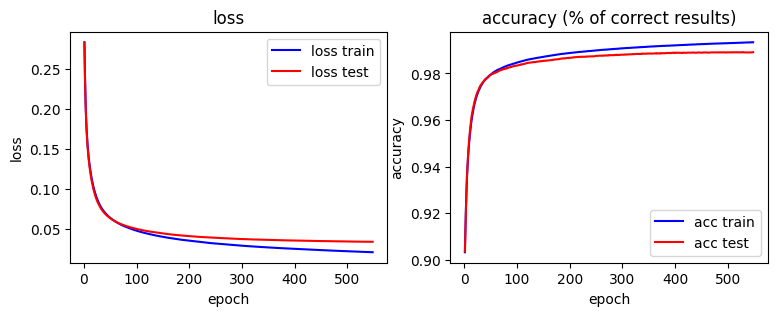

In [24]:
# visualisation: plot of loss and accuracy for train and test
train_loss = mes['train_loss']
test_loss = mes['test_loss']
train_acc = mes['train_acc']
test_acc = mes['test_acc']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
ax[0].plot(range(1,len(train_acc)+1),train_loss, c='b', label='loss train')
ax[0].plot(range(1,len(train_acc)+1),test_loss, c='r', label='loss test')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(range(1,len(train_acc)+1),train_acc, c='b', label='acc train')
ax[1].plot(range(1,len(train_acc)+1),test_acc, c='r', label='acc test')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].set_title('accuracy (% of correct results)')
ax[1].legend()
plt.show()

# keras FC NN model

In [25]:
import tensorflow as tf

In [44]:
# input and output dimensions of mnist data
input_dim = train_X.shape[1:]
output_dim = len(np.unique(train_y))
# create sequential model with sigmoid activation function as my FC NN from scratch
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_dim))
model.add(tf.keras.layers.Dense(units=N_units, activation='sigmoid')) #'sigmoid')) 
model.add(tf.keras.layers.Dense(units=N_units, activation='sigmoid')) #'sigmoid')) 
model.add(tf.keras.layers.Dense(units=output_dim, activation='sigmoid')) #'sigmoid')) 
# compile and use a crossentropy loss function as my fc nn from scratch
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['acc'])
# train the model with early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience)
history = model.fit(x=train_X, y=train_y,
                    epochs=N_epochs, batch_size=batch_size,
                    validation_data=(test_X, test_y),
                    callbacks=[callback],
                    verbose=verbose)
# get model summary
model.summary()

Epoch 1/1000
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7543 - acc: 0.6423 - val_loss: 1.2940 - val_acc: 0.7980
Epoch 2/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0071 - acc: 0.8250 - val_loss: 0.7878 - val_acc: 0.8525
Epoch 3/1000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6764 - acc: 0.8623 - val_loss: 0.5897 - val_acc: 0.8706
Epoch 4/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5472 - acc: 0.8738 - val_loss: 0.4980 - val_acc: 0.8811
Epoch 5/1000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4872 - acc: 0.8818 - val_loss: 0.4385 - val_acc: 0.8911
Epoch 6/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4518 - acc: 0.8834 - val_loss: 0.4038 - val_acc: 0.8934
Epoch 7/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4167 - acc: 0.8873 - val_loss: 0.3892 - val_acc: 0.8974
Epoch 8/1000
1875/1875 [======================

# Compare keras and from scratch model

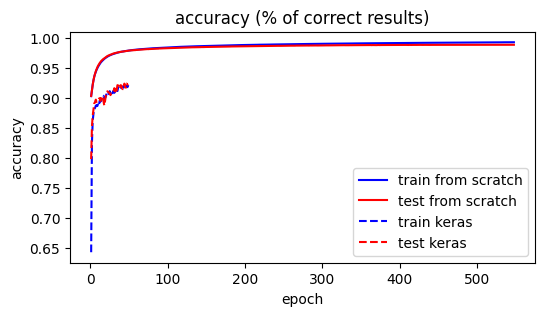

In [45]:
# visualisation: plot of loss and accuracy for train and test
train_loss = mes['train_loss']
test_loss = mes['test_loss']
train_acc = mes['train_acc']
test_acc = mes['test_acc']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
ax.plot(range(1,len(train_acc)+1),train_acc, 
        c='b', label='train from scratch')
ax.plot(range(1,len(test_acc)+1),test_acc, 
        c='r', label='test from scratch')
ax.plot(range(1,len(history.history['acc'])+1),history.history['acc'],
        c='b',ls='--',  label='train keras')
ax.plot(range(1,len(history.history['val_acc'])+1),history.history['val_acc'], 
        c='r',ls='--', label='test keras')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('accuracy (% of correct results)')
ax.legend()
plt.show()